In [1]:
import os
os.chdir("..")
print(os.getcwd())

D:\Documents\GitHub\Amazon-Image-matcher


In [2]:
import importlib
imported_module = importlib.import_module("imager.model")
importlib.reload(imported_module)
from imager.model import AmazonModel

match_model = AmazonModel(k=1)

D:\Documents\GitHub\Amazon-Image-matcher\.venv\Lib\site-packages\threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sean\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sean\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


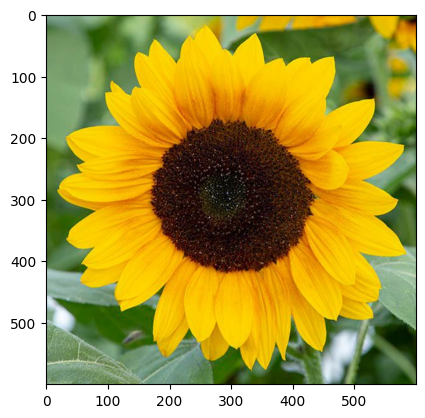

In [2]:
input_image = "../imager/sunflower/sunflower1.jpg"
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(input_image)
plt.imshow(img)

img_bytes = open(input_image, "rb").read()

In [3]:
links = match_model.predict(img_bytes)

In [4]:
print(links)

['https://www.amazon.in/Kraft-Seeds-Calendula-Flowering-Gardening/dp/B0B78HHW59/ref=sr_1_6388?qid=1679213710&s=garden&sr=1-6388', 'https://www.amazon.in/Mukhi-Rudraksha-Quality-Nepal-Certified/dp/B076KRQBDX/ref=sr_1_17602?qid=1679145748&s=jewelry&sr=1-17602', 'https://www.amazon.in/Airex-Gaillardia-Double-Summer-Flower/dp/B0799SC32F/ref=sr_1_5529?qid=1679213694&s=garden&sr=1-5529', 'https://www.amazon.in/SRI-SAI-FORESTRY-Sevanti-Chrysanthemum/dp/B0B8K4QDFZ/ref=sr_1_6545?qid=1679213714&s=garden&sr=1-6545', 'https://www.amazon.in/M-Tech-Gardens-Zinnia-Ornamental-Growing/dp/B07S348P72/ref=sr_1_9426?qid=1679213764&s=garden&sr=1-9426']


# Testing the model with a different image

In [34]:
import pandas as pd
test_df = pd.read_csv("imager/eval/amazon_products_sample_test.csv", encoding='iso-8859-1')
test_df = test_df.head(100)
test_df = test_df.tail(10)
display(test_df)

,name,image,link
87,Proctor Silex Durable Electric Vegetable Chopp...,https://m.media-amazon.com/images/I/81xTBFVJ4r...,https://www.amazon.com/dp/B09Q3M5ZT2/ref=sspa_...
88,"Keenstone Toaster Touch Control, Retro Toaster...",https://m.media-amazon.com/images/I/71r4Tw+2sr...,https://www.amazon.com/dp/B0CSSDWBQF/ref=sspa_...
89,"Bedsure Queen Sheets, Rayon Derived from Bambo...",https://m.media-amazon.com/images/I/81E346X4vW...,https://www.amazon.com/dp/B08CXTTTJ2/ref=sspa_...
90,Beckham Hotel Collection Bed Pillows King Size...,https://m.media-amazon.com/images/I/61mdPtC0iI...,https://www.amazon.com/Pillows-for-Sleeping-2-...
91,Goose Down and Feather Pillow for Side Sleeper...,https://m.media-amazon.com/images/I/41MDGnNtwR...,https://www.amazon.com/dp/B0CNP7GGHH/ref=sspa_...
92,Bedsure Mustard Yellow Fleece Blanket Throw Bl...,https://m.media-amazon.com/images/I/81kT3AeF64...,https://www.amazon.com/dp/B087RDRJ3K?ots=1&maa...
93,NEWCOSPLAY Super Soft Throw Blanket Dark Navy ...,https://m.media-amazon.com/images/I/81A4jKQ3B7...,https://www.amazon.com/dp/B0CWGP42FY/ref=sbl_d...
94,"uxcell Flannel Fleece Bed Blankets, Soft Warm ...",https://m.media-amazon.com/images/I/81pk5TkoIh...,https://www.amazon.com/dp/B083DHF98H/ref=sbl_d...
95,CAI TENG Fleece Throw Blankets Blanket 6 Pack ...,https://m.media-amazon.com/images/I/916qvVn-ak...,https://www.amazon.com/dp/B0C8YHGJHK/ref=sspa_...
96,"Polar Fleece Throw Blanket for Couch, Twin Bed...",https://m.media-amazon.com/images/I/71rRnCWFk+...,https://www.amazon.com/dp/B0BS1QSCJ1/ref=sbl_d...


In [4]:
import requests

# download image
def download_image(url):
    response = requests.get(url)
    if response.status_code != 200:
        return None
    img_data = response.content
    return img_data

In [37]:
X_test = []
for i, row in test_df.iterrows():
    img_bytes = download_image(row["image"])
    X_test.append(img_bytes)

Y_test = list(test_df["link"])

In [38]:
scores = match_model.eval(X_test, Y_test)
print(scores)

 40%|████      | 4/10 [00:59<01:27, 14.50s/it]

Failed to connect to https://www.amazon.in/Chozha-Sleeping-Bedding-Carrying-Multicolour/dp/B0BXM2BXLM/ref=sr_1_5978?qid=1679213180&s=kitchen&sr=1-5978


D:\Documents\GitHub\Amazon-Image-matcher\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Documents\GitHub\Amazon-Image-matcher\.venv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
D:\Documents\GitHub\Amazon-Image-matcher\.venv\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Documents\GitHub\Amazon-Image-matcher\.venv\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
D:\Documents\GitHub\Amazon-Image-matcher\.venv\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 10/10 [02:33<00:00

[(0.8130169, 0.0), (0.90002716, 0.0), (0.9083535, 0.0), (0.9873367, 0.0), (nan, nan), (0.8294987, 0.0), (0.705876, 0.0), (0.81603485, 0.0), (0.8048989, 0.0), (0.83822924, 0.0)]


['https://www.amazon.in/Hawk-Gloves-Model-XT-170-Size/dp/B07FMYSRJW',
 'https://www.amazon.in/Touch-Screen-Running-Gloves-Women/dp/B01KSLDRUA',
 'https://www.amazon.in/USI-UNIVERSAL-Lifting-Accessories-Fitness/dp/B091SWW985',
 'https://www.amazon.in/Cycling-Gloves-Leather-Stretchable-Durable/dp/B07C3ZN8HY',
 'https://www.amazon.in/Aim-Emporium-Genuine-Motorcycle-Anti-Slip/dp/B09BFXJ3MZ']

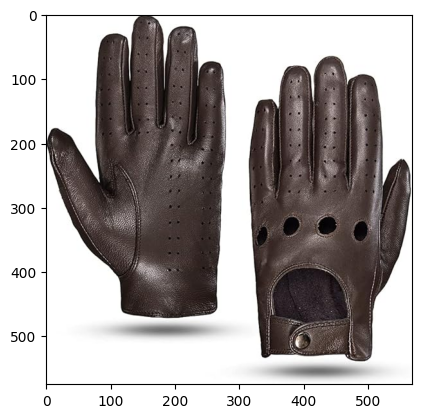

In [41]:
import io
import matplotlib.pyplot as plt
import PIL.Image as Image

i = 29

# display the image from img_bytes
img_bytes = X_test[i]
img = Image.open(io.BytesIO(img_bytes))
plt.imshow(img)

match_model.predict(X_test[i])